In [5]:
# ✈️ Airline Passenger Traffic - EDA
# Exploratory Data Analysis using Pandas and Seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\project'\\AirTraffic_Passenger_Statistics (1).csv")
df.head()


,Activity Period,Operating Airline,GEO Summary,GEO Region,Activity Type Code,Passenger Count,Terminal
0,201801,Delta,Domestic,US,Enplaned,50000,T1
1,201802,United,International,Europe,Deplaned,30000,T2
2,201803,Delta,Domestic,US,Enplaned,52000,T1
3,201804,American,Domestic,US,Enplaned,48000,T1
4,201901,Delta,Domestic,US,Deplaned,31000,T2


In [7]:
df['Activity Period'] = pd.to_datetime(df['Activity Period'], format='%Y%m')
df['Year'] = df['Activity Period'].dt.year
df['Month'] = df['Activity Period'].dt.month


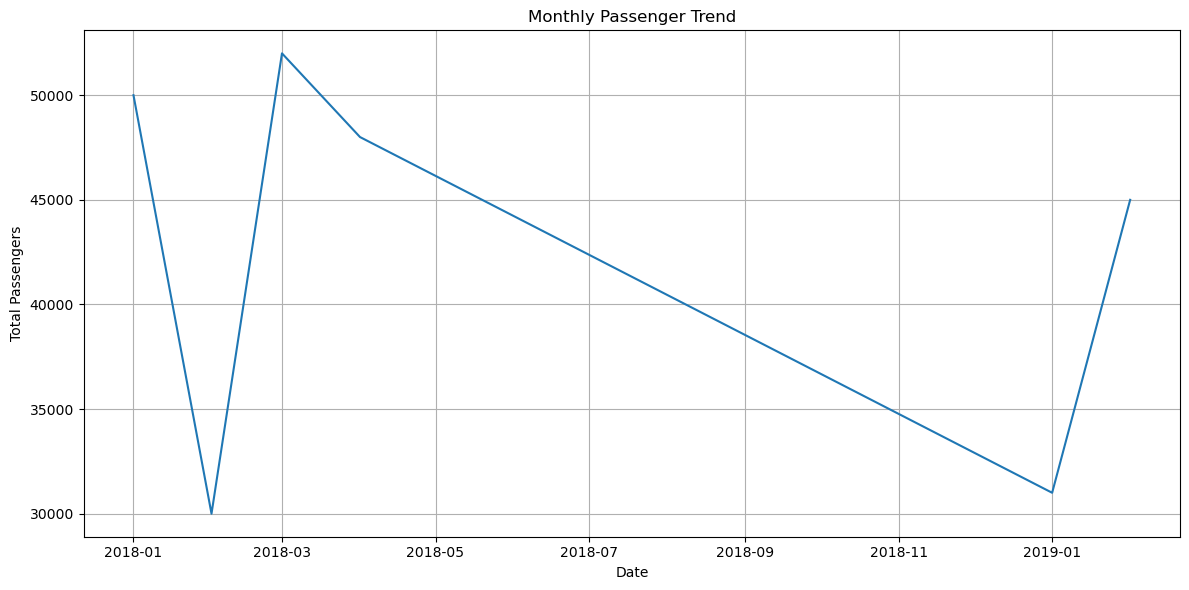

In [9]:
monthly = df.groupby(df['Activity Period'])['Passenger Count'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x='Activity Period', y='Passenger Count')
plt.title('Monthly Passenger Trend')
plt.xlabel('Date')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.tight_layout()
plt.show()


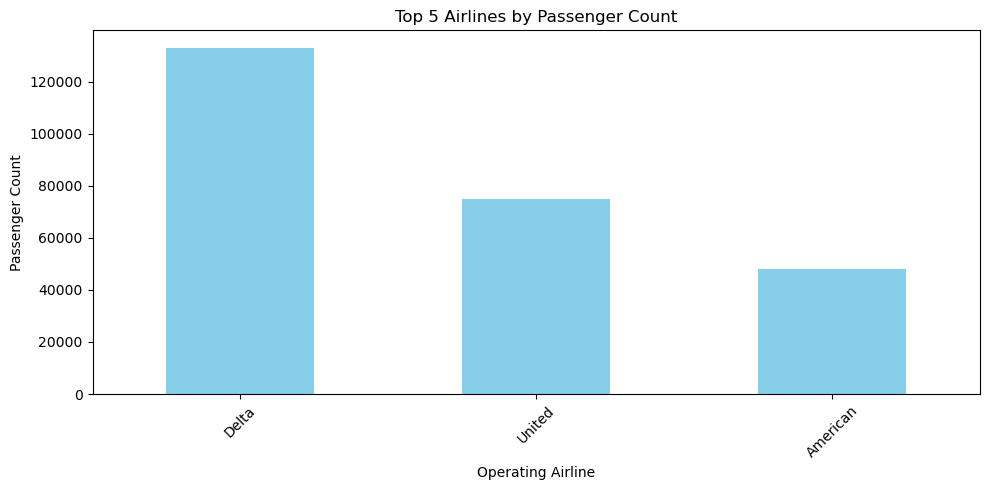

In [11]:
top_airlines = df.groupby('Operating Airline')['Passenger Count'].sum().sort_values(ascending=False).head(5)
top_airlines.plot(kind='bar', figsize=(10,5), title="Top 5 Airlines by Passenger Count", color='skyblue')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


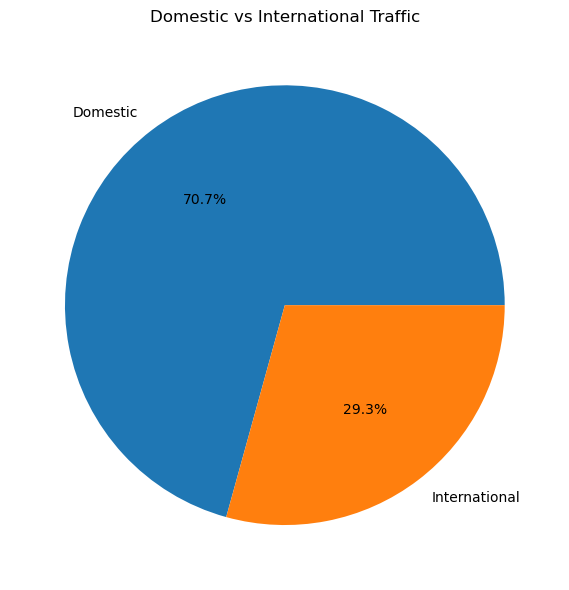

In [13]:
geo_summary = df.groupby('GEO Summary')['Passenger Count'].sum()
geo_summary.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title="Domestic vs International Traffic")
plt.ylabel('')
plt.tight_layout()
plt.show()


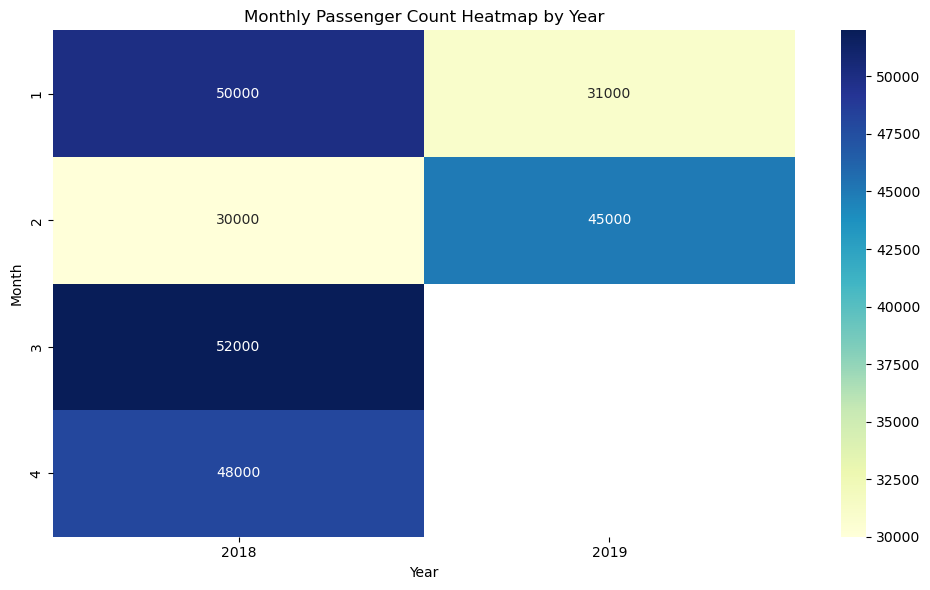

In [15]:
pivot = df.pivot_table(values='Passenger Count', index='Month', columns='Year', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Passenger Count Heatmap by Year")
plt.tight_layout()
plt.show()
